# Homework #2 
Josh Cohen
Questions: 4.1,4.2,4.5, 5.2,5.9

In [161]:
import numpy as np
import sympy as sym
%matplotlib notebook
from matplotlib import pyplot as plt

## Probelm 4.1

## Problem 4.2

## Problem 4.5

**a).** use 1st order optimality condition to determine the unique stationary point of $g(w) = \log(1+e^{w^Tw})$ where $w$ is 2D

In [89]:
w1, w2 = sym.symbols('w_1 w_2')
w = sym.Matrix([w1, w2])
g = sym.log(1 + sym.exp(w.T * w)[0])
grad_g = sym.Matrix([g]).jacobian(w)
ans = sym.solve(grad_g, w)
display(ans)

[(0, 0)]

In [84]:
display(g)
display(grad_g)

log(exp(w_1**2 + w_2**2) + 1)

Matrix([[2*w_1*exp(w_1**2 + w_2**2)/(exp(w_1**2 + w_2**2) + 1), 2*w_2*exp(w_1**2 + w_2**2)/(exp(w_1**2 + w_2**2) + 1)]])

Therefore it can be seen the first order optimality condition is satisfied at $w = (0,0)$

**b).** use second order defitionition of convexity to verify that g(w) is convex and thereore the stationary point is the global minimum

In [108]:
grad_2_g = grad_g.jacobian(w)
P, D = grad_2_g.diagonalize()

In [112]:
display(D)

Matrix([
[2*exp(w_1**2 + w_2**2)/(exp(w_1**2 + w_2**2) + 1),                                                                                                                               0],
[                                                0, 2*(2*w_1**2 + 2*w_2**2 + exp(w_1**2 + w_2**2) + 1)*exp(w_1**2 + w_2**2)/(2*exp(w_1**2 + w_2**2) + exp(2*w_1**2 + 2*w_2**2) + 1)]])

Therefore since $e^x$ can never be < 0, from the work done in 4.1 and 4.2 we can show that the NxN symmetric Hessian matrix will never be < 0, therefore the function is convex everywhere and the minima we found in part **a).** is the global minimum

**c).** Perform Newton's method to find the minimum of g(w) determined in part **a).**, initialize $w_0 = 1_{Nx1}$ plot the cost function over 10 iterations

In [167]:
cost_func = sym.lambdify([w], g)
grad = sym.lambdify([w], grad_g)
grad_2 = sym.lambdify([w], grad_2_g)
w_0_c = np.ones(2)

In [168]:
#define function that we will use for gradient descent
def grad_desc(w_last):
    num_its = 10
    cost_vals = np.zeros(num_its)
    grad_g_last = grad(w_last) 
    grad_2_g_last = grad_2(w_last)
    cost_vals[0] = cost_func(w_last)
#     print(cost_func(w_last))
#     print(grad_2_g_last.shape)
#     print(grad_g_last.T.shape)
    for x in range(1, num_its):
        w_next = w_last - np.matmul(np.linalg.inv(grad_2_g_last), grad_g_last.T)[0]
#         print(np.matmul(np.linalg.inv(grad_2_g_last), grad_g_last.T).shape)
#         print(w_last.shape)
#         print(w_next.shape)
        cost_vals[x] = cost_func(w_next)
        w_last = w_next
        grad_g_last = grad(w_last) 
        grad_2_g_last = grad_2(w_last)
    return cost_vals

<IPython.core.display.Javascript object>


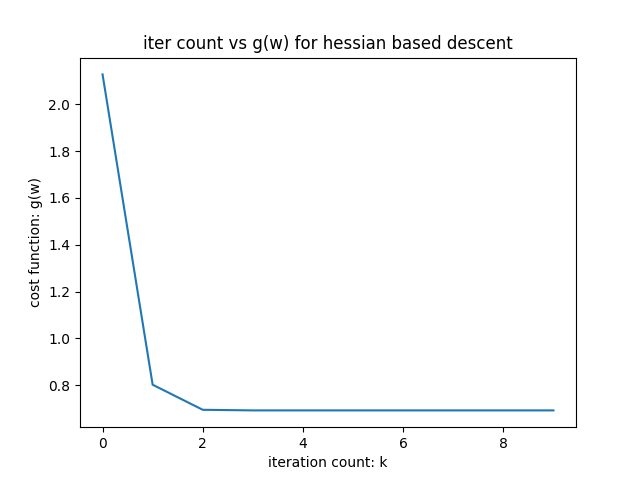

In [169]:
cost_vals = grad_desc(w_0_c)
plt.figure()
it_vec = np.arange(10)
plt.plot(it_vec, cost_vals)
plt.xlabel("iteration count: k")
plt.ylabel("cost function: g(w)")
plt.title("iter count vs g(w) for hessian based descent")
plt.show()

**d).** Run code from **c).** again with intiial guess at $w_0 = 4 * 1_{Nx1}$, explain behavior

<IPython.core.display.Javascript object>


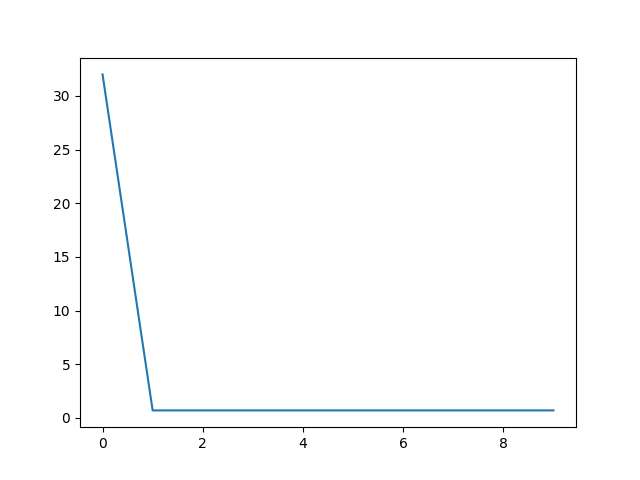

In [165]:
w_0 = np.ones(2) * 4
cost_vals_d = grad_desc(w_0)
#plotting above for comparrison 
plt.plot(it_vec, cost_vals_d)